In [1]:
%matplotlib inline
import json
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset_path = '/Users/AeliyaSakeen/Downloads/Taco/data'
anns_file_path = dataset_path + '/' + 'annotations.json'

# Read annotations
with open(anns_file_path, 'r') as f:
    dataset = json.loads(f.read())

categories = dataset['categories']
anns = dataset['annotations']
imgs = dataset['images']


# Load categories and super categories in list

cat_names = []
super_cat_names = []
super_cat_ids = {}
super_cat_last_name = ''
num_super_cats = 0
for cat_it in categories:
    cat_names.append(cat_it['name'])
    super_cat_name = cat_it['supercategory']
    # Adding new supercategories
    if super_cat_name != super_cat_last_name:
        super_cat_names.append(super_cat_name)
        super_cat_ids[super_cat_name] = num_super_cats
        super_cat_last_name = super_cat_name
        num_super_cats += 1

print('Number of super categories:', num_super_cats)
print('Number of categories:', len(categories))
print('Number of annotations:', len(anns))
print('Number of images:', len(imgs))


Number of super categories: 28
Number of categories: 60
Number of annotations: 4784
Number of images: 1500


In [2]:
print(categories[5],"\n\n",
anns[5])

{'supercategory': 'Bottle', 'id': 5, 'name': 'Clear plastic bottle'} 

 {'id': 6, 'image_id': 3, 'category_id': 5, 'segmentation': [[354.0, 1268.0, 351.0, 1252.0, 347.0, 1237.0, 343.0, 1230.0, 339.0, 1220.0, 336.0, 1203.0, 331.0, 1197.0, 315.0, 1182.0, 310.0, 1172.0, 302.0, 1168.0, 281.0, 1147.0, 267.0, 1128.0, 255.0, 1108.0, 242.0, 1089.0, 231.0, 1068.0, 218.0, 1052.0, 212.0, 1032.0, 209.0, 1019.0, 213.0, 1009.0, 231.0, 994.0, 249.0, 984.0, 262.0, 976.0, 270.0, 974.0, 284.0, 966.0, 302.0, 956.0, 313.0, 950.0, 322.0, 942.0, 326.0, 939.0, 339.0, 938.0, 351.0, 933.0, 361.0, 925.0, 379.0, 920.0, 392.0, 925.0, 407.0, 940.0, 421.0, 958.0, 430.0, 969.0, 452.0, 994.0, 467.0, 1014.0, 475.0, 1030.0, 479.0, 1049.0, 481.0, 1071.0, 489.0, 1098.0, 491.0, 1114.0, 501.0, 1120.0, 528.0, 1142.0, 541.0, 1153.0, 552.0, 1166.0, 551.0, 1176.0, 555.0, 1177.0, 579.0, 1213.0, 601.0, 1250.0, 608.0, 1257.0, 610.0, 1265.0, 612.0, 1274.0, 615.0, 1273.0, 622.0, 1274.0, 627.0, 1282.0, 626.0, 1289.0, 626.0, 1297.0, 

/Users/AeliyaSakeen/.conda/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_values except for the argument 'by' will be keyword-only
  # Remove the CWD from sys.path while we load stuff.


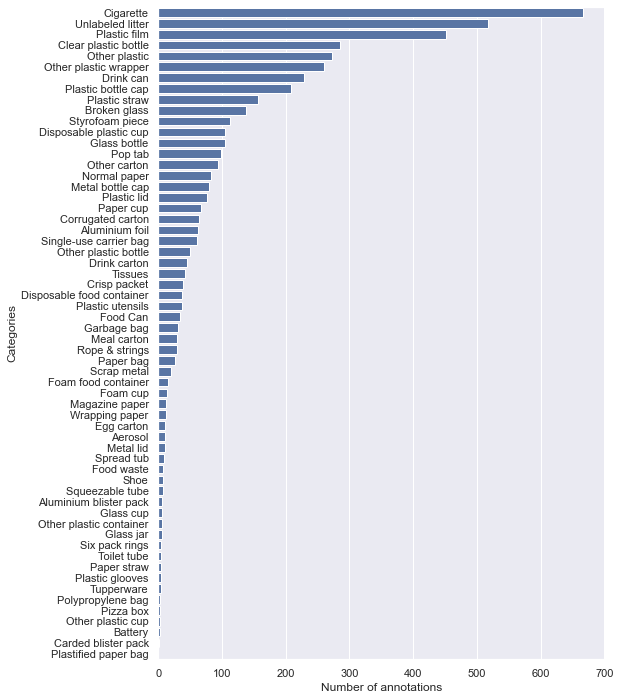

In [3]:
cat_histogram = np.zeros(len(categories),dtype=int)
for ann in anns:
    cat_histogram[ann['category_id']] += 1

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(8,12))

# Convert to DataFrame
df = pd.DataFrame({'Categories': cat_names, 'Number of annotations': cat_histogram})
df = df.sort_values('Number of annotations', 0, False)

# Plot the histogram
# sns.set_color_codes("pastel")
# sns.set(style="whitegrid")
plot_1 = sns.barplot(x="Number of annotations", y="Categories", data=df,
            label="Total", color="b")

# fig = plot_1.get_figure()
# fig.savefig("output.png")

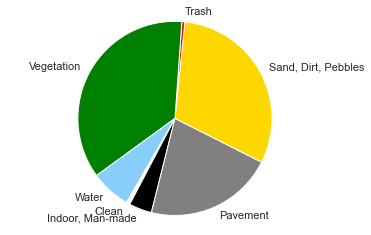

In [4]:
# Get scene cat names
scene_cats = dataset['scene_categories']
scene_name = []
for scene_cat in scene_cats:
    scene_name.append(scene_cat['name'])

nr_scenes = len(scene_cats)
scene_cat_histogram = np.zeros(nr_scenes,dtype=int)

for scene_ann in dataset['scene_annotations']:    
    scene_ann_ids = scene_ann['background_ids']
    for scene_ann_id in scene_ann_ids:
        if scene_ann_id<len(scene_cats):
            scene_cat_histogram[scene_ann_id]+=1

# Convert to DataFrame
df = pd.DataFrame({'scene_cats': scene_cats, 'nr_annotations': scene_cat_histogram})
 
# Plot
colors = ['white','black','gray', 'gold', 'red','green','lightskyblue']
plt.pie(scene_cat_histogram, labels=scene_name, colors = colors,
      shadow=False, startangle=-120)
 
plt.axis('equal')
plt.show()

loading annotations into memory...
Done (t=0.06s)
creating index...
index created!
batch_11/000021.jpg


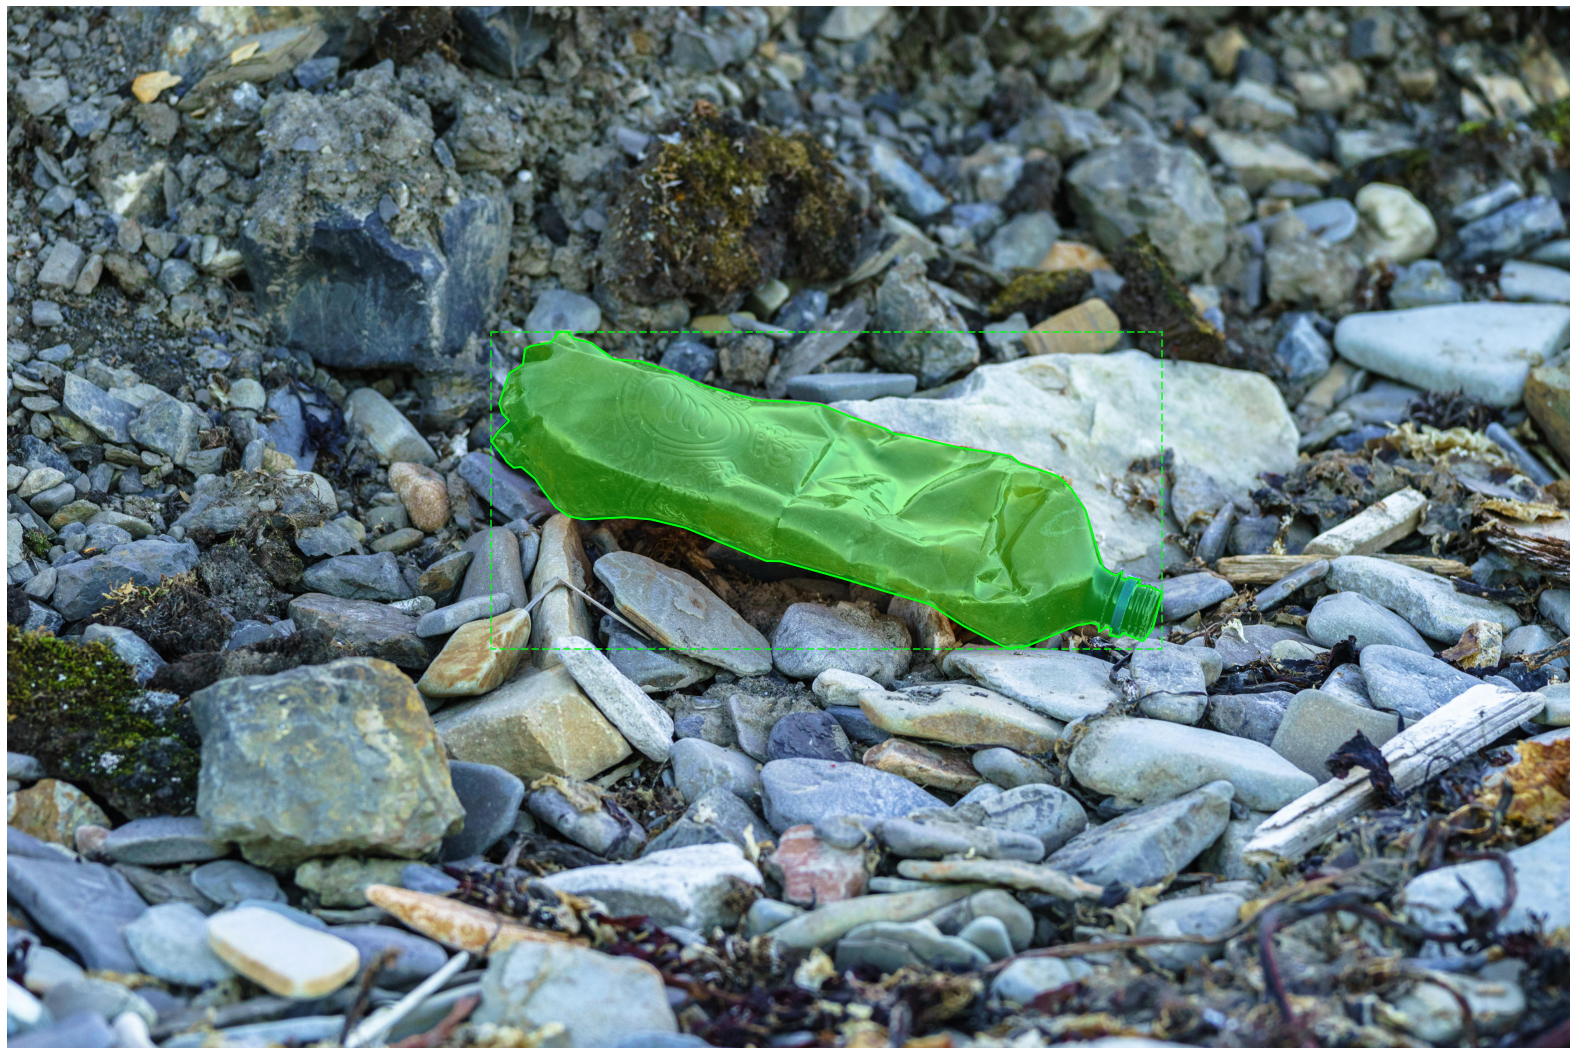

In [5]:
from PIL import Image, ExifTags
from pycocotools.coco import COCO
from matplotlib.patches import Polygon, Rectangle
from matplotlib.collections import PatchCollection
import colorsys
import random
import pylab

# User settings
image_filepath = 'batch_11/000021.jpg'
pylab.rcParams['figure.figsize'] = (28,28)
####################

# Obtain Exif orientation tag code
for orientation in ExifTags.TAGS.keys():
    if ExifTags.TAGS[orientation] == 'Orientation':
        break

# Loads dataset as a coco object
coco = COCO(anns_file_path)

# Find image id
img_id = -1
for img in imgs:
    if img['file_name'] == image_filepath:
        img_id = img['id']
        break

# Show image and corresponding annotations
if img_id == -1:
    print('Incorrect file name')
else:

    # Load image
    print(image_filepath)
    I = Image.open(dataset_path + '/' + image_filepath)

    # Load and process image metadata
    if I._getexif():
        exif = dict(I._getexif().items())
        # Rotate portrait and upside down images if necessary
        if orientation in exif:
            if exif[orientation] == 3:
                I = I.rotate(180,expand=True)
            if exif[orientation] == 6:
                I = I.rotate(270,expand=True)
            if exif[orientation] == 8:
                I = I.rotate(90,expand=True)

    # Show image
    fig,ax = plt.subplots(1)
    plt.axis('off')
    plt.imshow(I)

    # Load mask ids
    annIds = coco.getAnnIds(imgIds=img_id, catIds=[], iscrowd=None)
    anns_sel = coco.loadAnns(annIds)

    # Show annotations
    for ann in anns_sel:
        color = colorsys.hsv_to_rgb(np.random.random(),1,1)
        for seg in ann['segmentation']:
            poly = Polygon(np.array(seg).reshape((int(len(seg)/2), 2)))
            p = PatchCollection([poly], facecolor=color, edgecolors=color,linewidths=0, alpha=0.4)
            ax.add_collection(p)
            p = PatchCollection([poly], facecolor='none', edgecolors=color, linewidths=2)
            ax.add_collection(p)
        [x, y, w, h] = ann['bbox']
        rect = Rectangle((x,y),w,h,linewidth=2,edgecolor=color,
                         facecolor='none', alpha=0.7, linestyle = '--')
        ax.add_patch(rect)

    plt.show()

loading annotations into memory...
Done (t=0.10s)
creating index...
index created!
Number of images found:  4


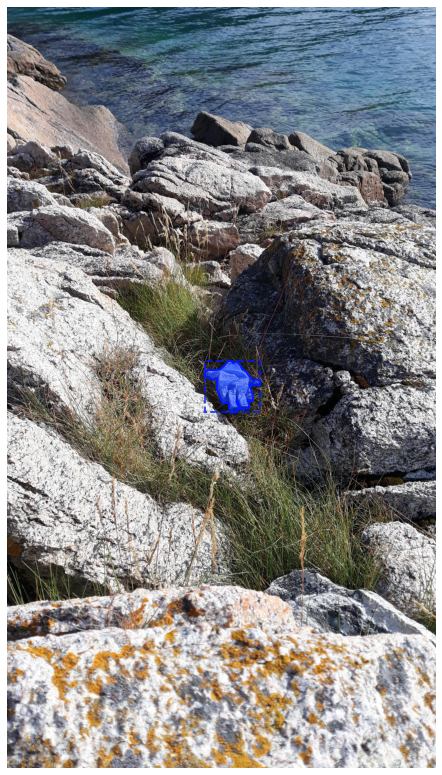

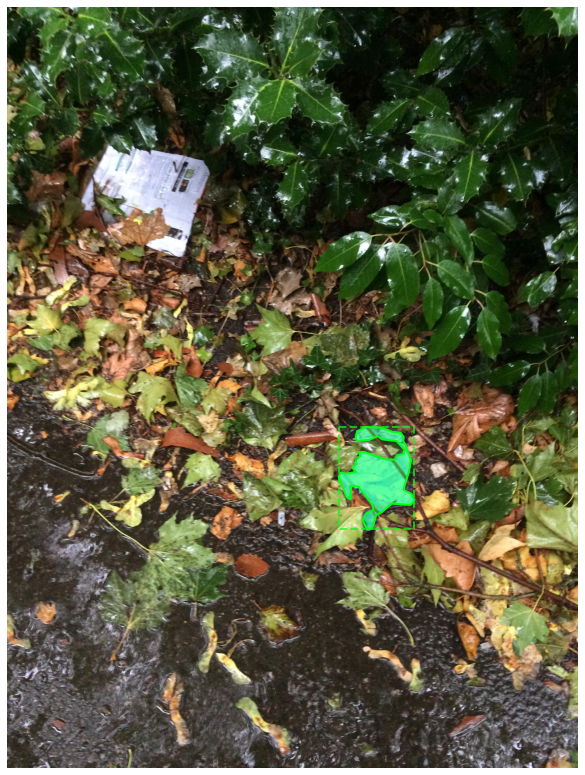

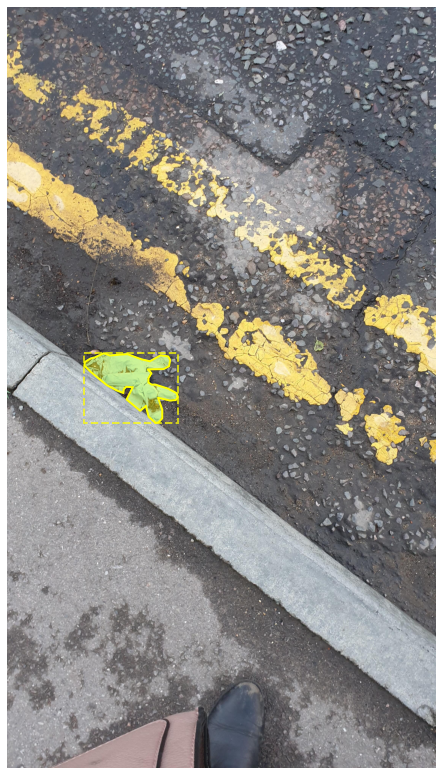

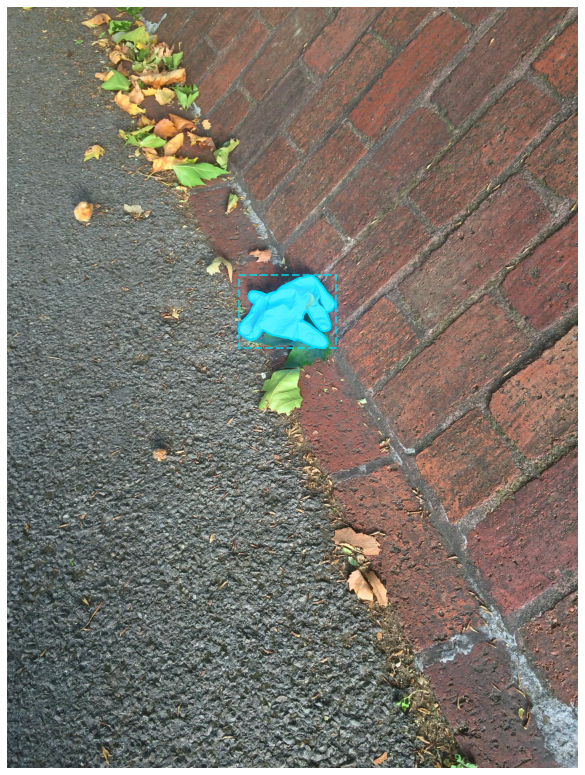

In [6]:
from PIL import Image, ExifTags
from pycocotools.coco import COCO
from matplotlib.patches import Polygon, Rectangle
from matplotlib.collections import PatchCollection
import colorsys
import random
import pylab

# User settings
nr_img_2_display = 10
category_name = 'Plastic glooves'
pylab.rcParams['figure.figsize'] = (14,14)
####################

# Obtain Exif orientation tag code
for orientation in ExifTags.TAGS.keys():
    if ExifTags.TAGS[orientation] == 'Orientation':
        break

# Loads dataset as a coco object
coco = COCO(anns_file_path)

# Get image ids
imgIds = []
catIds = coco.getCatIds(catNms=[category_name])
if catIds:
    # Get all images containing an instance of the chosen category
    imgIds = coco.getImgIds(catIds=catIds)
else:
    # Get all images containing an instance of the chosen super category
    catIds = coco.getCatIds(supNms=[category_name])
    for catId in catIds:
        imgIds += (coco.getImgIds(catIds=catId))
    imgIds = list(set(imgIds))

nr_images_found = len(imgIds) 
print('Number of images found: ',nr_images_found)

# Select N random images
random.shuffle(imgIds)
imgs = coco.loadImgs(imgIds[0:min(nr_img_2_display,nr_images_found)])

for img in imgs:
    image_path = dataset_path + '/' + img['file_name']
    # Load image
    I = Image.open(image_path)
    
    # Load and process image metadata
    if I._getexif():
        exif = dict(I._getexif().items())
        # Rotate portrait and upside down images if necessary
        if orientation in exif:
            if exif[orientation] == 3:
                I = I.rotate(180,expand=True)
            if exif[orientation] == 6:
                I = I.rotate(270,expand=True)
            if exif[orientation] == 8:
                I = I.rotate(90,expand=True)
    
    # Show image
    fig,ax = plt.subplots(1)
    plt.axis('off')
    plt.imshow(I)

    # Load mask ids
    annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
    anns_sel = coco.loadAnns(annIds)
    
    # Show annotations
    for ann in anns_sel:
        color = colorsys.hsv_to_rgb(np.random.random(),1,1)
        for seg in ann['segmentation']:
            poly = Polygon(np.array(seg).reshape((int(len(seg)/2), 2)))
            p = PatchCollection([poly], facecolor=color, edgecolors=color,linewidths=0, alpha=0.4)
            ax.add_collection(p)
            p = PatchCollection([poly], facecolor='none', edgecolors=color, linewidths=2)
            ax.add_collection(p)
        [x, y, w, h] = ann['bbox']
        rect = Rectangle((x,y),w,h,linewidth=2,edgecolor=color,
                         facecolor='none', alpha=0.7, linestyle = '--')
        ax.add_patch(rect)

    plt.show()